In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import seaborn as sns
sns.set()

## Load data

In [2]:
sample_data_path = os.path.join(os.path.pardir,'data','raw')
sample_data = os.path.join(sample_data_path,'1.01.csv')
data = pd.read_csv(sample_data)

In [3]:
!pwd
!ls

/Users/georgemutti/Documents/George/DataScience/all-about-data/all-about-data/notebooks
$hello_world_file
1.0-extract-titanic-dataset.ipynb
2.0-exploaring-and-processing-data2.ipynb
Api Request.ipynb
Api.ipynb
Building predictive models.ipynb
Dummy Variables.ipynb
Dummy variables_with_comments.ipynb
Multiple Linear Regression Exercise Solution.ipynb
Multiple Linear Regression Exercise.ipynb
Simple Linear Regression Exercise Solution.ipynb
Simple Linear Regression Exercise.ipynb
Simple Linear Regression with sklearn - Exercise Solution.ipynb
Simple Linear Regression with sklearn - Exercise.ipynb
Titanic data.ipynb
Udemy.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
classroomDB.db
database connection.ipynb
database.ipynb


In [4]:
data.loc[5:2]

,SAT,GPA


In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Regression 
### Define dependent and indipendent variable

In [6]:
y = data['GPA']
X1 = data['SAT']

### Explore the data

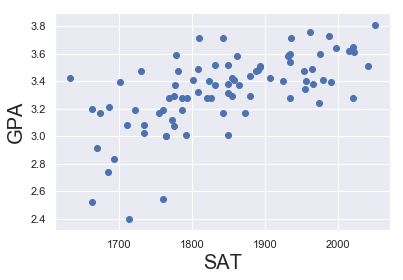

In [7]:
plt.scatter(X1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Regression

In [8]:
x = sm.add_constant(X1)
results = sm.OLS(y,x).fit()
results.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           7.20e-11
Time:                        11:55:12   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

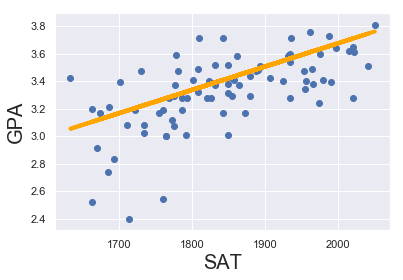

In [9]:
plt.scatter(X1,y)
yhat = 0.0017*X1 + 0.2750
fig = plt.plot(X1,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [10]:
multiple_regression_data_path = os.path.join(os.path.pardir,'data','raw')
multiple_regression_data = os.path.join(multiple_regression_data_path,'1.02.csv')
multiple_regression = pd.read_csv(multiple_regression_data)
multiple_regression.tail()

,SAT,GPA,"Rand 1,2,3"
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1
83,2050,3.81,2


In [11]:
y = multiple_regression['GPA']
X1 = multiple_regression[['SAT','Rand 1,2,3']]

In [12]:
x =sm.add_constant(X1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           6.58e-10
Time:                        11:55:12   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical Data Dummy Variables

In [13]:
categorical_data = os.path.join(os.path.pardir,'data','raw','1.03.Dummies.csv')
categorical_data = pd.read_csv(categorical_data)
categorical_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


### Converting categorical data

In [14]:
categorical_data_copy = categorical_data.copy()

In [15]:
categorical_data_copy['Attendance'] = categorical_data['Attendance'].map({'Yes':1,'No':0})
categorical_data_copy.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [16]:
categorical_data_copy.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


### Regression

In [17]:
y = categorical_data_copy['GPA']
X1 = categorical_data_copy[['SAT','Attendance']]

In [18]:
x = sm.add_constant(X1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           2.19e-15
Time:                        11:55:12   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

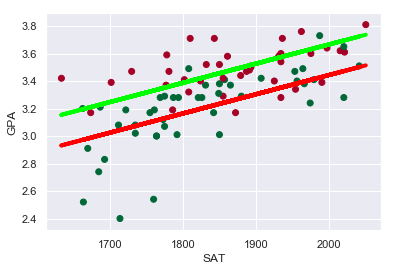

In [19]:
plt.scatter(categorical_data_copy['SAT'],y,c=categorical_data_copy['Attendance'],cmap='RdYlGn_r')
yhat_yes= 0.8665 + 0.0014*categorical_data_copy['SAT']
yhat_no= 0.6439 + 0.0014*categorical_data_copy['SAT']
fig = plt.plot(categorical_data_copy['SAT'],yhat_yes,lw=4,c='#00ff00')
fig = plt.plot(categorical_data_copy['SAT'],yhat_no,lw=4,c='#ff0000')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

### Predict data

In [20]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [21]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           2.19e-15
Time:                        11:55:13   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
prediction = result.predict(new_data)
prediction

0    3.023513
1    3.204163
dtype: float64

## Linear Regression With Sklearn
### Sklearn
#### Advantage
- incredible documentation
- Variety
- Numerical stable

### Simpler liner regression using Sklearn

### import modules

In [35]:
from sklearn.linear_model import LinearRegression

### Load the data 

In [36]:
sample_data= os.path.join(os.path.pardir,'data','raw','1.01.csv')
data_sk = pd.read_csv(sample_data)
data_sk.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create the regression

### Declare the dependent and idependet variables

In [37]:
x = data_sk['SAT']
Y = data_sk['GPA']
x.shape
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [38]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### R squred

In [39]:
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

In [40]:
reg.coef_

array([0.00165569])

### Intercepts

In [41]:
reg.intercept_

0.2750402996602803

### Making predictions

In [42]:
reg.predict([1730,1])

ValueError: Expected 2D array, got 1D array instead:
array=[1730    1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [43]:
new_data = pd.DataFrame(data=[1732,1738],columns=['SAT'])
reg.predict(new_data)

array([3.142692  , 3.15262613])

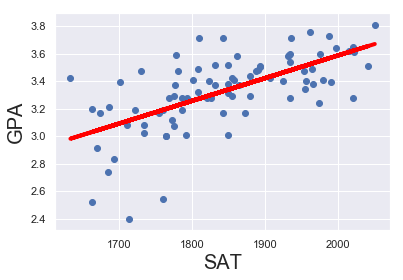

In [44]:
plt.scatter(x,y)
yhat = reg.coef_*data_sk['SAT'] + reg.intercept_
fig = plt.plot(x,yhat, lw='4',c='#ff0000', label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Multiple linear regression

In [45]:
multiple_linear_regression = os.path.join(os.path.pardir,'data','raw','1.02.Multiple linear regression.csv')
multiple_linear_regression = pd.read_csv(multiple_linear_regression)
multiple_linear_regression.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [46]:
multiple_linear_regression.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


### Creating Multiple linear regression
### Declaring depedent and indipedent variable

In [47]:
y = multiple_linear_regression['GPA']
x = multiple_linear_regression[['SAT','Rand 1,2,3']]

### Regression its self

In [48]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [50]:
reg.intercept_

0.29603261264909486

### R Squred

In [51]:
reg.score(x,y)

0.4066811952814285

### Formula for adjusted Math R^2
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [52]:
x.shape
# 84 number of obervation
# 2 number of predictors

(84, 2)

In [57]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

### Feature selection
- Procedure used to detect unneded variables in a model
- f_regression creates a simple regressions of each feature and the dependent variable

### Feature Selection

In [58]:
from sklearn.feature_selection import f_regression

In [59]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [61]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [62]:
p_values.round(3)

array([0.   , 0.676])

### Creating a summary table using P values

In [63]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [65]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


- P-values are best way to determine if a variable is redundant, but they provide no information whatsover about how usefull is the value

### Standartization
- Process of transforming data into a standard scale

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
scaler.fit(x)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
x_scaled = scaler.transform(x)
x_scaled

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

### Regression with scaled features

In [71]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
reg.coef_

array([ 0.17181389, -0.00703007])

### Predicting with The standardized Coefficients

### Overfitting and Underfitting

 ### Practicle Example Linear regression

In [1]:
import numpy as np
import pandas as pd
import startsmodles asg

SyntaxError: invalid syntax (<ipython-input-1-179ddcafe909>, line 3)